In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)
print(tf.keras.__version__)

2.3.0
2.4.0


In [4]:
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

fashon_mnist : MNIST 와 같이 10가지로 옷 종류 (운동화, 셔츠, 등등) 분류할 수 있는
28x28 픽셀 이미지 70,000개 

트레이닝 셋과 테스트 셋 분류되어 있음

(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()
기본 데이터 타입 : int

레이블 : 
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot


In [8]:
y_train_full.shape

(60000,)

In [9]:
print(y_train_full[0])

9


In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [11]:
X_train_full[0].shape

(28, 28)

In [12]:
# 검증 데이터 만들기, 255로 나누어 0~1 의 값으로 조정
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [13]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
              "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
# 은닉층 2개인 다층 퍼셉트론

# keras의 가장 간단한 신경망 모델. 순서대로 연결된 층을 일렬로 쌓아서 구성
model = keras.models.Sequential()
# 첫번째 층
# Flatten : 입력 이미지를 일차원으로 변경
# input_shape를 지정해야함 (입력 데이터 : X => X.reshape(-1,1)을 계산함)
# input_shape=[28,28]로 지정된 것 = keras.layers.InputLayer
# [28,28] : 입력 데이터 shape = (28,28)
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Dense : 뉴런을 300, 100, 10개 가지는 은닉층 생성, activation : 활성화 함수
# Dense 층마다 가중치 행렬을 관리
# 이 행렬에는 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함, 편향은 벡터로 관리
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
# 출력층 활성화 함수 (출력함수) : softmax
model.add(keras.layers.Dense(10, activation="softmax"))

# 위 모든 것과 다 같은 것
"""
model = keras.models.Sequential([
            keras.layers.Flatten(input_size=[28,28]),
            keras.layers.Dense(300,activation="relu"),
            keras.layers.Dense(100,activation="relu"),
            keras.layers.Dense(10,activation="softmax")
])
"""

'\nmodel = keras.models.Sequential([\n            keras.layers.Flatten(input_size=[28,28]),\n            keras.layers.Dense(300,activation="relu"),\n            keras.layers.Dense(100,activation="relu"),\n            keras.layers.Dense(10,activation="softmax")\n])\n'

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
input0 = model.layers[0]
hidden1 = model.layers[1]
hidden2 = model.layers[2]
hidden3 = model.layers[3]

In [17]:
print(input0.name, hidden1.name, hidden2.name, hidden3.name)

flatten dense dense_1 dense_2


In [18]:
# 가중치 보기, 초기화를 따로 하지 않으면 무작위로 초기화
weights, biases = hidden1.get_weights() 
print(weights.shape)
print(weights)
print(biases.shape)
print(biases)

(784, 300)
[[-0.02496411  0.05262119  0.02148519 ...  0.00704606 -0.01219616
  -0.00780336]
 [-0.00728064 -0.02558921  0.01198664 ... -0.03731711 -0.01781959
  -0.01344827]
 [-0.04412084 -0.06651291 -0.07412681 ... -0.06968372 -0.01532047
   0.05667511]
 ...
 [ 0.00538479  0.06437938  0.06942172 ... -0.01061887  0.0567681
   0.00906415]
 [-0.01668057 -0.0455225   0.01565193 ... -0.05793554  0.00969496
   0.02166706]
 [-0.03948191  0.02816358  0.01284135 ... -0.03850654 -0.03482139
   0.06028986]]
(300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [19]:
# 모델 컴파일
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
              metrics=["accuracy"])

# 클래스가 배타적이므로 sparse_categorical_crossentropy
# 샘플마다 클래스 별 타깃 확률을 가진다면 
# (원-핫 벡터 포함) 손실함수 : categorical_crossentropy
# 이진 분류 수행하면 출력 층에 softmax 대신 sigmoid 사용, 손실 함수 : binary_crossentropy
# sparse labe(희소 레이블)을 원-핫 벡터 레이블로 변환 : keras.utils.to_categorical

# optimizer : 가중치 최적화 함수 설정
# sgd : 기본적인 확률적 경사 강하법
# 보통 sgd 사용하면 학습률 (lr) 같이 사용, default=0.01
# optimizer = keras.optimizer.SGD(lr=???) 와 같이 사용 가능 

In [20]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# fit : 모델 훈련시키는 메서드
# epochs 따로 설정 안 하면 default=1
# 검증 데이터는 선택사항
# validation_data 대신 validation_split=0.1 로 하면
# 검증 데이터를 훈련 데이터의 10%를 사용
# fit : epoch 마다 정확도 출력해줌
# 훈련 데이터나 검증 데이터 오버피팅 (과적합) 발생 여부 체크 가능
# 한 쪽이 월등히 크다면 그 쪽으로 오버피팅 발생 

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7246 - accuracy: 0.7627 - val_loss: 0.5004 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4912 - accuracy: 0.8281 - val_loss: 0.4582 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4448 - accuracy: 0.8432 - val_loss: 0.4170 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4167 - accuracy: 0.8536 - val_loss: 0.4226 - val_accuracy: 0.8514
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3974 - accuracy: 0.8597 - val_loss: 0.3924 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3822 - accuracy: 0.8654 - val_loss: 0.3710 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3680 - accuracy: 0.8696 - val_loss: 0.3981 - val_accuracy:

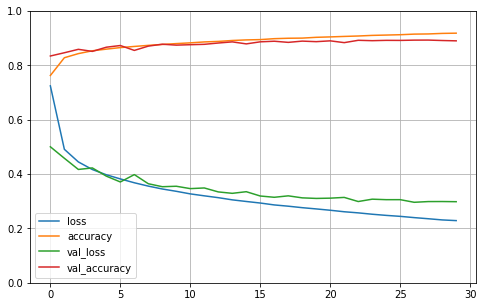

In [21]:
# fit 메서드는 History 객체를 반환
# 훈련 파라미터 (history.params), 에폭 리스트 (history.epoch)
# 에폭 끝날 때 마다 훈련 데이터와 검증 데이터에 대한 
# 손실, 측정 지표를 담은 딕셔너리 (history.history) 등이 포함됨

# history.history를 이용해 학습 곡선 확인하기
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
# predict : 샘플에 대한 예측
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
# predict_classes : 없어짐, 아래 대체 방법, predict_classes 실행하면 에러로 알려줌
# 확률이 가장 높은 클래스만 
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [30]:
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')